<a href="https://colab.research.google.com/github/anshmehta337/deep-learning/blob/main/bonus_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving bonus_dataset.csv to bonus_dataset.csv


In [6]:
import torch
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('bonus_dataset.csv')

In [8]:
df

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178
3,EMP_004,5,7,8,138
4,EMP_005,7,8,9,170
...,...,...,...,...,...
95,EMP_096,10,8,9,206
96,EMP_097,9,5,8,174
97,EMP_098,7,4,7,142
98,EMP_099,9,2,3,146


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          100 non-null    object
 1   performance          100 non-null    int64 
 2   years_of_experience  100 non-null    int64 
 3   projects_completed   100 non-null    int64 
 4   bonus                100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [10]:
#no missing values to handle


In [11]:
df.describe()

,performance,years_of_experience,projects_completed,bonus
count,100.000000,100.00,100.000000,100.000000
mean,5.910000,5.21,7.220000,136.620000
std,2.871296,2.90,2.887031,38.278823
min,1.000000,1.00,2.000000,42.000000
25%,3.000000,3.00,4.750000,109.000000
50%,6.000000,5.00,7.500000,142.000000
75%,8.000000,7.00,9.250000,164.500000
max,10.000000,10.00,13.000000,214.000000


In [12]:
df['performance']=df['performance']/10
df['years_of_experience']=df['years_of_experience']/10
df['projects_completed']=df['projects_completed']/13

In [29]:
perf=torch.tensor(df['performance'].values,requires_grad=True,dtype=torch.float32)
exp=torch.tensor(df['years_of_experience'].values,requires_grad=True,dtype=torch.float32)
proj=torch.tensor(df['projects_completed'].values,requires_grad=True,dtype=torch.float32)
bon=torch.tensor(df['bonus'].values,requires_grad=True,dtype=torch.float32)

In [30]:
w1=torch.randn(1,requires_grad=True)
w2=torch.randn(1,requires_grad=True)
w3=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)

In [70]:
epochs=5000
lr=0.018

In [71]:
for epoch in range(epochs):
  pr=w1*perf+w2*exp+w3*proj+b
  loss=((pr-bon)**2).mean()
  loss.backward()
  with torch.no_grad():
   w1-=lr*w1.grad
   w2-=lr*w2.grad
   w3-=lr*w3.grad
   b-=lr*b.grad
  w1.grad.zero_()
  w2.grad.zero_()
  w3.grad.zero_()
  b.grad.zero_()
  if(epoch%100==0):
    print(loss.item())


0.0023849448189139366
0.0023409754503518343
0.0022978377528488636
0.002255552913993597
0.002213968662545085
0.0021737224888056517
0.002134287729859352
0.002095395466312766
0.0020572817884385586
0.0020197047851979733
0.0019822639878839254
0.0019454773282632232
0.0019097918411716819
0.0018748805159702897
0.0018408227479085326
0.0018075719708576798
0.0017744048964232206
0.001742008375003934
0.0017101343255490065
0.0016785545740276575
0.0016476595774292946
0.0016172260511666536
0.0015878358390182257
0.0015589356189593673
0.0015307158464565873
0.0015029874630272388
0.0014756121672689915
0.0014484473504126072
0.0014218762516975403
0.0013958661584183574
0.001370227662846446
0.001345051801763475
0.0013203934067860246
0.0012966329231858253
0.00127307022921741
0.0012500300072133541
0.0012274881592020392
0.0012052067322656512
0.0011830683797597885
0.0011611568043008447
0.0011395885376259685
0.001118347980082035
0.001098028034903109
0.0010780616430565715
0.001058297697454691
0.0010392487747594714


In [72]:
w1.item(),w2.item(),w3.item(),b.item()

(119.991943359375, 59.63676452636719, 26.47994613647461, 19.927270889282227)

In [73]:
x=7/10
y=8/10
z=9/13
with torch.no_grad():
 pred=x*w1.item()+y*w2.item()+z*w3.item()+b

In [74]:
pred

tensor([169.9633])

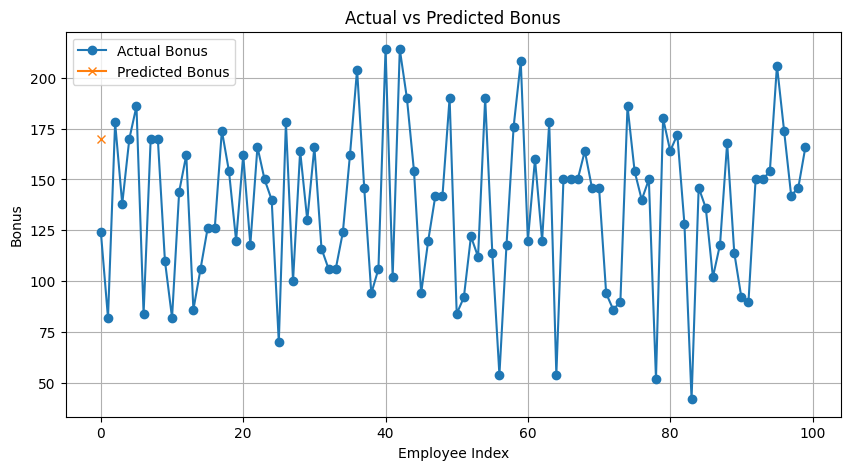

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(bon.detach().numpy(), label='Actual Bonus', marker='o')
plt.plot(pred.detach().numpy(), label='Predicted Bonus', marker='x')
plt.xlabel('Employee Index')
plt.ylabel('Bonus')
plt.title('Actual vs Predicted Bonus')
plt.legend()
plt.grid(True)
plt.show()
